<h1 style="background-color: #f7a8b8; color: #555555; padding: 20px; border-radius: 10px; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); font-family: 'Helvetica', sans-serif; font-size: 36px; letter-spacing: 2px; text-transform: uppercase;">END TO END Food Demand Forecasting</h1>

*In this notebook I have published, I would like to introduce you to my end-to-end data science project. My job problem is described below.*

*This project aims to contribute to the growth of the business by making an end-to-end demand forecast on the data set of a food distribution company. Sending company food orders to customers
The client asks you to assist these centers in forecasting demand for the coming weeks so that they can plan their raw material stocks accordingly. Most raw materials are procured on a weekly basis and supply planning is extremely important as raw materials are perishable. In addition, the number of employees of the centers is another area that greatly helps in making accurate demand forecasts. Based on the information below, the task is to predict future demands for medium meal combinations in the test set.*



*In this end-to-end project, I will describe the steps I did in order.*

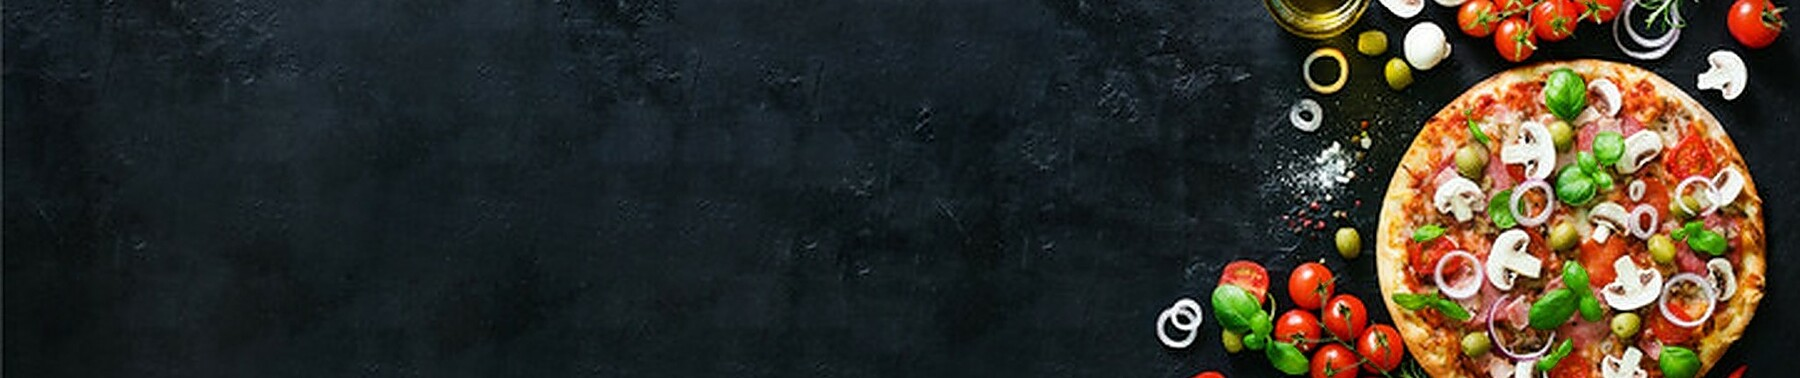

<html>
<head>
<style>
  body {
    font-family: Arial, sans-serif;
    margin: 0;
    padding: 20px;
  }

  .header {
    background-color: #D8B4FF;
    color: white;
    padding: 20px;
    text-align: center;
    font-size: 32px;
    margin-bottom: 40px;
  }

  .section {
    margin-bottom: 40px;
  }

  .section-title {
    background-color: #F4C2C2;
    color: white;
    padding: 15px;
    font-size: 24px;
    margin-bottom: 20px;
    text-align: center;
    border-radius: 10px;
  }

  .step {
    display: flex;
    align-items: center;
    margin-bottom: 20px;
  }

  .step-img {
    flex: 0 0 300px;
    margin-right: 20px;
  }

  .step-content {
    flex: 1;
  }

  .step-title {
    color: #f44336;
    font-size: 20px;
    margin-bottom: 10px;
  }

  .step-description {
    font-size: 16px;
    line-height: 1.5;
  }
</style>
</head>
<body>
  <div class="header">
    <h1>Notebook Content</h1>
  </div>

  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #ff4081; color: white; padding: 10px; border-radius: 5px;">1. EDA (Exploratory Data Analysis)</div>
        <div class="step-description">
          <ul>
            <li>In this step, the data was recognized, analyzes and visualization studies were carried out according to the variable types.</li>
          </ul>
        </div>
      </div>
    </div>
  </div>

  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #fa4535; color: white; padding: 10px; border-radius: 5px;">2. DATA PRE-PROCESSING</div>
        <div class="step-description">
          <ul>
            <li>In this step, coding, missing value and outlier analysis were performed..</li>
          </ul>
        </div>
      </div>
    </div>
  </div>

  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #ffc48b; color: white; padding: 10px; border-radius: 5px;">3. FEATURE ENGINEERING</div>
        <div class="step-description">
          <ul>
            <li>In this step, new variables are derived from existing variables.</li>
          </ul>
        </div>
      </div>
    </div>
  </div>

  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #a7d0e0; color: white; padding: 10px; border-radius: 5px;">4. HYPERPARAMETER OPTIMIZATION</div>
        <div class="step-description">
          <ul>
            <li>In this step, the hyperparameters are optimized to improve the performance of our model.</li>
            <li>Techniques such as automatic hyperparameter tuning have been used.</li>
          </ul>
        </div>
      </div>
    </div>
  </div>

  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #444444; color: white; padding: 10px; border-radius: 5px;">5. FINAL MODEL</div>
        <div class="step-description">
          <ul>
            <li>In this step, the final model was established with the optimized parameters.</li>
          </ul>
        </div>
      </div>
    </div>
  </div>
    
  <div class="section">
    <div class="section-title"></div>
    <div class="step">
      <div class="step-content">
        <div class="step-title" style="background-color: #a785e0; color: white; padding: 10px; border-radius: 5px;">6. IMPORTANCE VARIABLES</div>
        <div class="step-description">
          <ul>
            <li>In this step, the effect of newly added and original variables on model accuracy was observed.</li>
          </ul>
        </div>
      </div>
    </div>
  </div>
</body>
</html>


<h3 style="background-color: #daf862; color: #333223; padding: 12px; border: 2px solid #ff9800; border-radius: 8px; font-family: 'Tahoma', sans-serif; font-size: 18px; text-align: center; font-weight: bold;">IMPORT</h3>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/food-demand-forecasting/meal_info.csv
/kaggle/input/food-demand-forecasting/sample_submission.csv
/kaggle/input/food-demand-forecasting/fulfilment_center_info.csv
/kaggle/input/food-demand-forecasting/train.csv
/kaggle/input/food-demand-forecasting/test.csv


In [2]:
train_raw = pd.read_csv('/kaggle/input/food-demand-forecasting/train.csv')
test_raw = pd.read_csv('/kaggle/input/food-demand-forecasting/test.csv')
meal = pd.read_csv('/kaggle/input/food-demand-forecasting/meal_info.csv')
centerinfo = pd.read_csv('/kaggle/input/food-demand-forecasting/fulfilment_center_info.csv')


In [3]:
train = pd.merge(train_raw, meal, on="meal_id", how="left")
df = pd.merge(train, centerinfo, on="center_id", how="left")
print("Shape of train data : ", df.shape)
df.head()

Shape of train data :  (456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


<h3 style="background-color: #ffc48b; color: #333333; padding: 12px; border: 2px solid #ff9800; border-radius: 8px; font-family: 'Tahoma', sans-serif; font-size: 18px; text-align: center; font-weight: bold;">Helper Functions</h3>

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


In [6]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [7]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [8]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [10]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [11]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quantile1 = dataframe[col_name].quantile(q1)
  quantile3 = dataframe[col_name].quantile(q3)
  iqr= quantile3 - quantile1
  up = quantile3 + 1.5 * iqr
  low = quantile1 - 1.5 * iqr
  return low, up

def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
      return True
  else:
      return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [12]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [13]:
def objective(trial):
    lgbm_params = {
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "early_stopping_round": trial.suggest_int("early_stopping_rounds", 2, 300),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.2),
        "subsample": trial.suggest_float("subsample", 0.5, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1),
        "num_iterations": trial.suggest_int("num_iterations", 50, 2500),
        "num_leaves": trial.suggest_int("num_leaves", 10, 500),
        "n_jobs": -1,
        "random_state": 41,
        "verbosity": -99
    }
    
    lgbm_model = LGBMRegressor(**lgbm_params)
    lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="mse", verbose=False)
    
    y_pred = lgbm_model.predict(X_test)
    score = mean_squared_error(y_true=y_test, y_pred=y_pred)
    return score

In [14]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [15]:

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

<h2 style="background-color: #a7d0e0; color: #333333; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">1. EDA</h2>

In [16]:
check_df(df)

##################### Shape #####################
(456548, 15)
##################### Types #####################
id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object
##################### Head #####################
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50     

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

              category      Ratio
Beverages       127890  28.012389
Rice Bowl        33408   7.317522
Sandwich         33291   7.291895
Pizza            33138   7.258382
Starters         29941   6.558128
Other Snacks     29379   6.435030
Desert           29294   6.416412
Salad            28559   6.255421
Pasta            27694   6.065956
Seafood          26916   5.895547
Biryani          20614   4.515188
Extras           13562   2.970553
Soup             12675   2.776269
Fish             10187   2.231310
##########################################


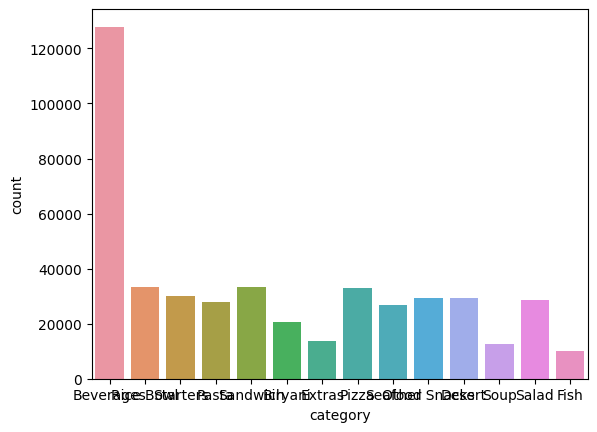

             cuisine      Ratio
Italian       122925  26.924880
Thai          118216  25.893444
Indian        112612  24.665972
Continental   102795  22.515705
##########################################


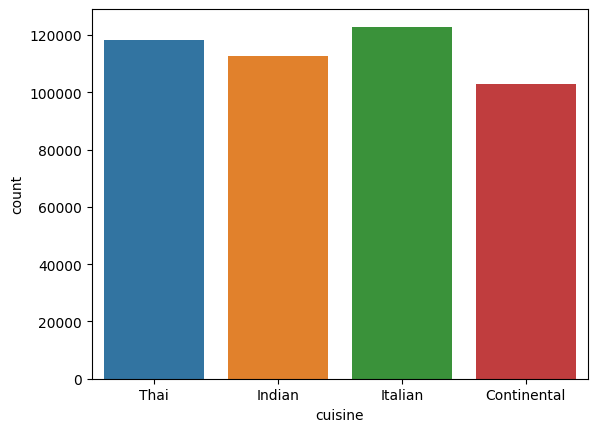

        center_type      Ratio
TYPE_A       262881  57.580145
TYPE_C        99593  21.814355
TYPE_B        94074  20.605500
##########################################


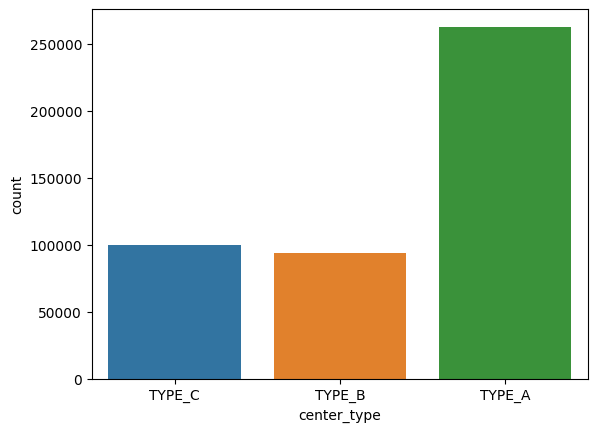

   emailer_for_promotion      Ratio
0                 419498  91.884753
1                  37050   8.115247
##########################################


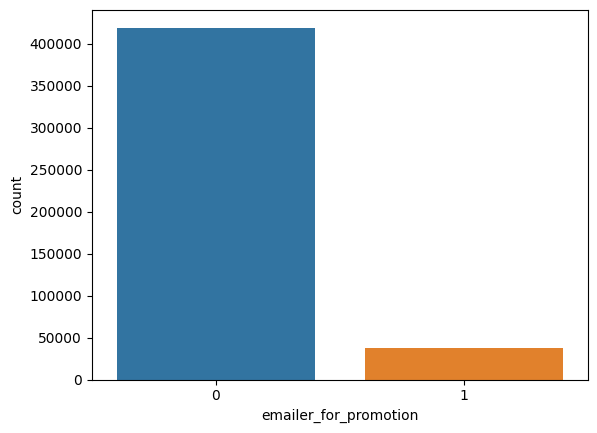

   homepage_featured      Ratio
0             406693  89.080009
1              49855  10.919991
##########################################


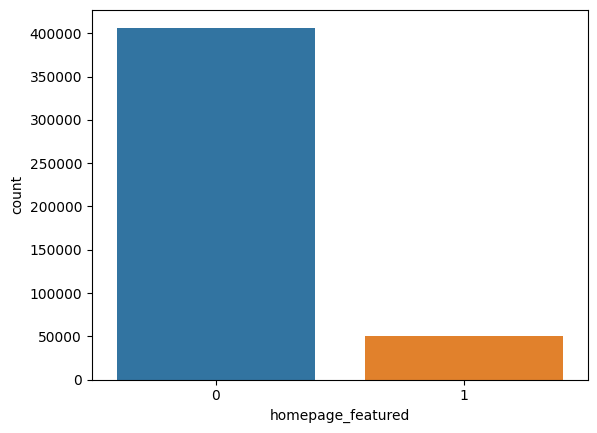

In [18]:
for col in cat_cols:
    cat_summary(df, col,plot=True)

count    4.565480e+05
mean     1.250096e+06
std      1.443548e+05
min      1.000000e+06
5%       1.025009e+06
10%      1.049949e+06
20%      1.100019e+06
30%      1.150087e+06
40%      1.200186e+06
50%      1.250184e+06
60%      1.300142e+06
70%      1.350208e+06
80%      1.400051e+06
90%      1.450094e+06
95%      1.475046e+06
99%      1.495002e+06
max      1.499999e+06
Name: id, dtype: float64


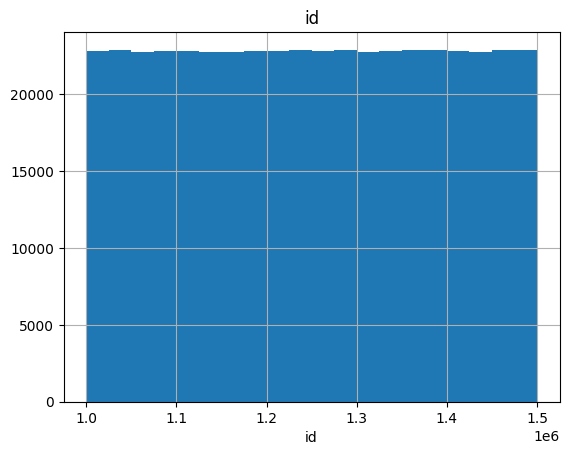

count    456548.000000
mean         74.768771
std          41.524956
min           1.000000
5%            8.000000
10%          16.000000
20%          32.000000
30%          47.000000
40%          61.000000
50%          76.000000
60%          90.000000
70%         104.000000
80%         118.000000
90%         132.000000
95%         139.000000
99%         144.000000
max         145.000000
Name: week, dtype: float64


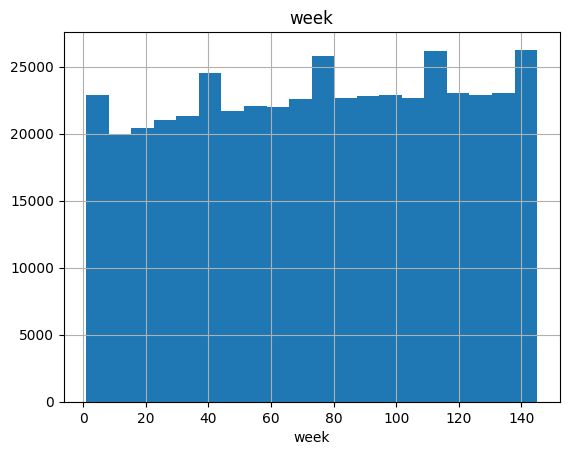

count    456548.000000
mean         82.105796
std          45.975046
min          10.000000
5%           14.000000
10%          23.000000
20%          36.000000
30%          53.000000
40%          66.000000
50%          76.000000
60%          91.000000
70%         104.000000
80%         129.000000
90%         152.000000
95%         161.000000
99%         186.000000
max         186.000000
Name: center_id, dtype: float64


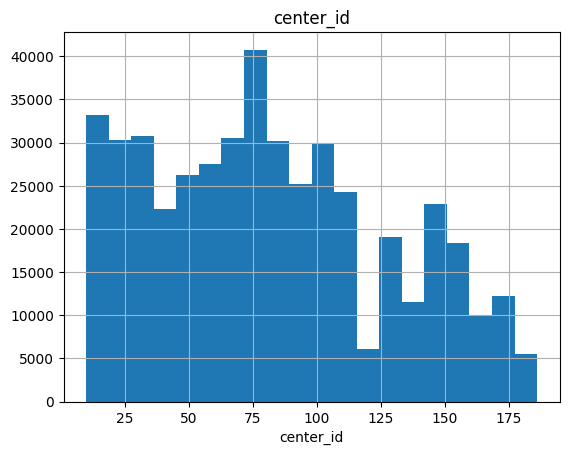

count    456548.000000
mean       2024.337458
std         547.420920
min        1062.000000
5%         1198.000000
10%        1216.000000
20%        1445.000000
30%        1727.000000
40%        1878.000000
50%        1993.000000
60%        2304.000000
70%        2492.000000
80%        2581.000000
90%        2704.000000
95%        2760.000000
99%        2867.000000
max        2956.000000
Name: meal_id, dtype: float64


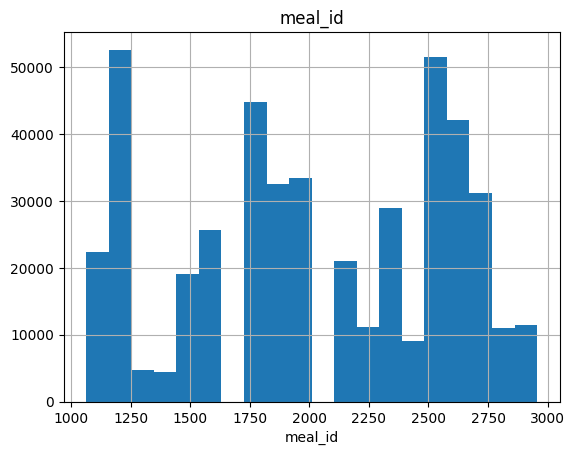

count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
5%          121.280000
10%         151.380000
20%         192.090000
30%         243.500000
40%         281.330000
50%         296.820000
60%         323.070000
70%         402.550000
80%         466.630000
90%         581.030000
95%         640.230000
99%         708.130000
max         866.270000
Name: checkout_price, dtype: float64


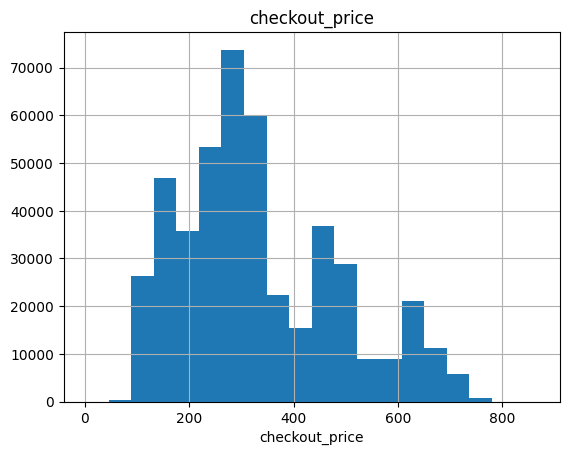

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
5%          144.530000
10%         155.260000
20%         222.190000
30%         270.630000
40%         290.030000
50%         310.460000
60%         329.860000
70%         438.497000
80%         485.030000
90%         630.530000
95%         668.330000
99%         726.530000
max         866.270000
Name: base_price, dtype: float64


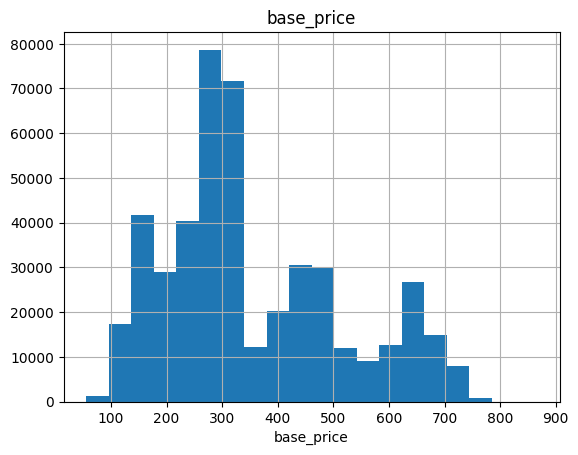

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
5%           14.000000
10%          26.000000
20%          41.000000
30%          68.000000
40%          95.000000
50%         136.000000
60%         190.000000
70%         270.000000
80%         391.000000
90%         609.000000
95%         878.000000
99%        1796.000000
max       24299.000000
Name: num_orders, dtype: float64


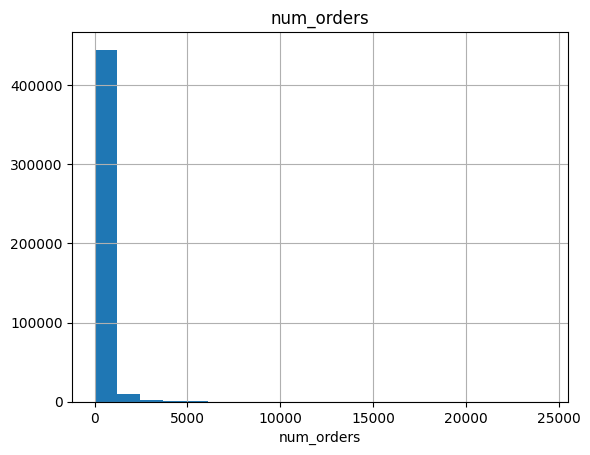

count    456548.000000
mean        601.553399
std          66.195914
min         456.000000
5%          478.000000
10%         517.000000
20%         526.000000
30%         576.000000
40%         590.000000
50%         596.000000
60%         615.000000
70%         647.000000
80%         675.000000
90%         695.000000
95%         700.000000
99%         713.000000
max         713.000000
Name: city_code, dtype: float64


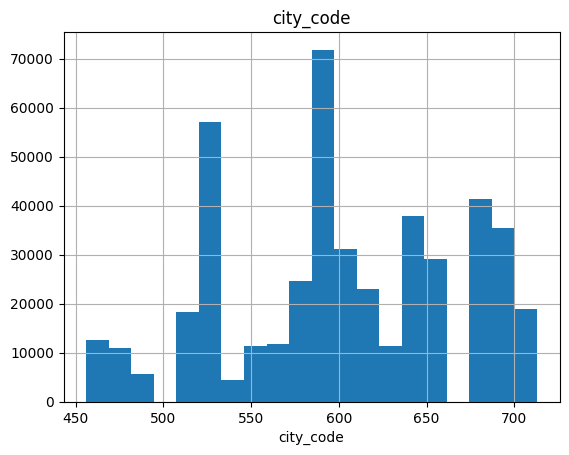

count    456548.000000
mean         56.614566
std          17.641306
min          23.000000
5%           34.000000
10%          34.000000
20%          34.000000
30%          56.000000
40%          56.000000
50%          56.000000
60%          56.000000
70%          56.000000
80%          77.000000
90%          77.000000
95%          85.000000
99%          93.000000
max          93.000000
Name: region_code, dtype: float64


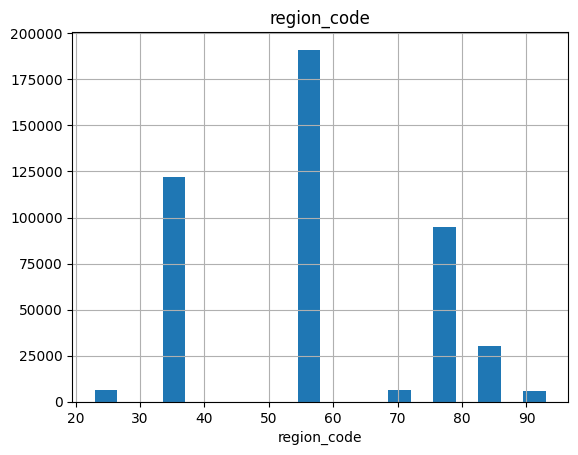

count    456548.000000
mean          4.083590
std           1.091686
min           0.900000
5%            2.700000
10%           2.800000
20%           3.400000
30%           3.800000
40%           3.900000
50%           4.000000
60%           4.100000
70%           4.400000
80%           4.700000
90%           5.300000
95%           6.700000
99%           7.000000
max           7.000000
Name: op_area, dtype: float64


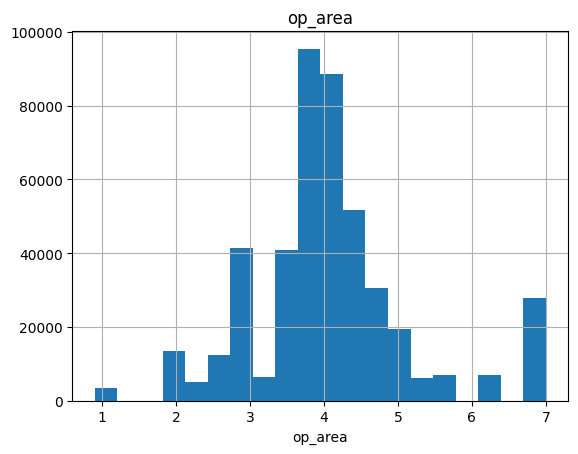

In [19]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [20]:
for col in num_cols:
    target_summary_with_num(df, "num_orders", col)

                      id
num_orders              
13          1.250155e+06
14          1.250991e+06
15          1.250817e+06
26          1.250261e+06
27          1.250086e+06
...                  ...
13150       1.346216e+06
13580       1.470267e+06
14229       1.087163e+06
15336       1.300512e+06
24299       1.452474e+06

[1250 rows x 1 columns]


                  week
num_orders            
13           74.559813
14           74.047840
15           74.282414
26           74.328009
27           73.991537
...                ...
13150       132.000000
13580         5.000000
14229         6.000000
15336         7.000000
24299         5.000000

[1250 rows x 1 columns]


            center_id
num_orders           
13          85.228442
14          85.214670
15          85.410688
26          84.440866
27          85.273251
...               ...
13150       43.000000
13580       10.000000
14229       43.000000
15336       43.000000
24299       43.000000

[1250 rows x 1 columns]


         

<h2 style="background-color: #a7d086; color: #333333; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">2. DATA PRE-PROCESSING</h2>

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
for col in num_cols:
    if col != "num_orders":
        replace_with_thresholds(df,col)

for col in num_cols:
    if col != "num_orders":
      print(col, check_outlier(df, col))

id False
week False
center_id False
meal_id False
checkout_price False
base_price False
city_code False
region_code False
op_area False


In [23]:
missing_values_table(df, True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

In [24]:
df = rare_encoder(df, 0.02)
rare_analyser(df, "num_orders", cat_cols)

category : 14
               COUNT     RATIO  TARGET_MEAN
Beverages     127890  0.280124   316.526116
Biryani        20614  0.045152    30.651402
Desert         29294  0.064164    66.250905
Extras         13562  0.029706   293.834169
Fish           10187  0.022313    85.595268
Other Snacks   29379  0.064350   162.234691
Pasta          27694  0.060660    59.137142
Pizza          33138  0.072584   222.817309
Rice Bowl      33408  0.073175   624.822288
Salad          28559  0.062554   383.218460
Sandwich       33291  0.072919   529.776276
Seafood        26916  0.058955   100.895898
Soup           12675  0.027763    82.023353
Starters       29941  0.065581   155.276110


cuisine : 4
              COUNT     RATIO  TARGET_MEAN
Continental  102795  0.225157   164.545348
Indian       112612  0.246660   229.039037
Italian      122925  0.269249   359.347830
Thai         118216  0.258934   276.423411


center_type : 3
         COUNT     RATIO  TARGET_MEAN
TYPE_A  262881  0.575801   262.394456
TYP

In [25]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560.0,1,55.0,1885.0,136.83,152.29,0,0,177,Beverages,Thai,647,56.0,TYPE_C,2.25
1,1466964.0,1,55.0,1993.0,136.83,135.83,0,0,270,Beverages,Thai,647,56.0,TYPE_C,2.25
2,1346989.0,1,55.0,2539.0,134.86,135.86,0,0,189,Beverages,Thai,647,56.0,TYPE_C,2.25
3,1338232.0,1,55.0,2139.0,339.50,437.53,0,0,54,Beverages,Indian,647,56.0,TYPE_C,2.25
4,1448490.0,1,55.0,2631.0,243.50,242.50,0,0,40,Beverages,Indian,647,56.0,TYPE_C,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326.0,145,61.0,1543.0,484.09,484.09,0,0,68,Desert,Indian,473,77.0,TYPE_A,4.50
456544,1062036.0,145,61.0,2304.0,482.09,482.09,0,0,42,Desert,Indian,473,77.0,TYPE_A,4.50
456545,1110849.0,145,61.0,2664.0,237.68,321.07,0,0,501,Salad,Italian,473,77.0,TYPE_A,4.50
456546,1147725.0,145,61.0,2569.0,243.50,313.34,0,0,729,Salad,Italian,473,77.0,TYPE_A,4.50


In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

<h2 style="background-color: #a7a986; color: #333333; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">3. FEATURE ENGINEERING</h2>


In [27]:
# Discount rate
df['new_discount_rate'] = (df['base_price'] - df['checkout_price']) / df['base_price']
# Food Profitability
df['new_meal_profitability'] = df['base_price'] - df['checkout_price']
# Featured Food on Home Page
df['new_featured_on_homepage'] = df['homepage_featured'].map({0: 'No', 1: 'Yes'})
# Email Promotion
df['new_email_promotion'] = df['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
# Profitability Percentage of Food
df['new_meal_profitability_percent'] = (df['new_meal_profitability'] / df['base_price']) * 100
# Order Center Type and City-Code Combination
df['new_center_type_city_code'] = df['center_type'] + '_' + df['city_code'].astype(str)
# Order Completion Time
df['new_order_completion_time'] = (df['checkout_price'] / df['op_area']).round(2)
# Combination of Food Category and Cuisine
df['new_meal_category_cuisine'] = df['category'] + '_' + df['cuisine']
def completion_time_category(time):
    if time <= 10:
        return 'Hızlı'
    elif time <= 20:
        return 'Orta'
    else:
        return 'Yavaş'

df['new_completion_time_category'] = df['new_order_completion_time'].apply(completion_time_category)
df['new_center_meal_category'] = df['center_id'].astype(str) + '_' + df['category']
# Meal Price Change Rate
df['new_price_change_rate'] = (df['checkout_price'] - df['base_price']) / df['base_price']
# Food Price Trend
df['new_price_trend'] = df.groupby('meal_id')['base_price'].transform(lambda x: x.diff())
# Food Category and City Combination
df['new_category_city'] = df['category'] + '_' + df['center_type']
# E-mail Promotion and Home Page Featured Food Combination
df['new_promotion_featured'] = df['new_email_promotion'] + '_' + df['new_featured_on_homepage']


In [28]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

In [29]:
for col in num_cols:
    if col != "num_orders":
        replace_with_thresholds(df,col)

for col in num_cols:
    if col != "num_orders":
      print(col, check_outlier(df, col))

id False
week False
center_id False
meal_id False
checkout_price False
base_price False
city_code False
region_code False
op_area False
new_discount_rate False
new_meal_profitability False
new_meal_profitability_percent False
new_order_completion_time False
new_price_change_rate False
new_price_trend False


In [30]:
missing_values_table(df, True)

                 n_miss  ratio
new_price_trend      51   0.01


['new_price_trend']

In [31]:
df = rare_encoder(df, 0.02)
rare_analyser(df, "num_orders", cat_cols)

category : 14
               COUNT     RATIO  TARGET_MEAN
Beverages     127890  0.280124   316.526116
Biryani        20614  0.045152    30.651402
Desert         29294  0.064164    66.250905
Extras         13562  0.029706   293.834169
Fish           10187  0.022313    85.595268
Other Snacks   29379  0.064350   162.234691
Pasta          27694  0.060660    59.137142
Pizza          33138  0.072584   222.817309
Rice Bowl      33408  0.073175   624.822288
Salad          28559  0.062554   383.218460
Sandwich       33291  0.072919   529.776276
Seafood        26916  0.058955   100.895898
Soup           12675  0.027763    82.023353
Starters       29941  0.065581   155.276110


cuisine : 4
              COUNT     RATIO  TARGET_MEAN
Continental  102795  0.225157   164.545348
Indian       112612  0.246660   229.039037
Italian      122925  0.269249   359.347830
Thai         118216  0.258934   276.423411


center_type : 3
         COUNT     RATIO  TARGET_MEAN
TYPE_A  262881  0.575801   262.394456
TYP

In [32]:
df.dropna(axis=0, inplace=True)

In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)

In [34]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [35]:
df.columns = [col.upper() for col in df.columns]

In [36]:
y = df["NUM_ORDERS"]
X = df.drop(["NUM_ORDERS"], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
df

,ID,WEEK,CENTER_ID,MEAL_ID,CHECKOUT_PRICE,BASE_PRICE,NUM_ORDERS,CITY_CODE,REGION_CODE,OP_AREA,...,NEW_CATEGORY_CITY_RICE BOWL_TYPE_A,NEW_CATEGORY_CITY_SALAD_TYPE_A,NEW_CATEGORY_CITY_SANDWICH_TYPE_A,NEW_CATEGORY_CITY_SEAFOOD_TYPE_A,NEW_CATEGORY_CITY_STARTERS_TYPE_A,NEW_PROMOTION_FEATURED_NO_YES,NEW_PROMOTION_FEATURED_YES_NO,NEW_PROMOTION_FEATURED_YES_YES,EMAILER_FOR_PROMOTION_1,HOMEPAGE_FEATURED_1
33,1040403.0,1,24.0,1885.0,136.83,136.83,1498,614,85.0,3.6,...,0,0,0,0,0,0,0,0,0,0
34,1012104.0,1,24.0,1993.0,134.83,135.83,1243,614,85.0,3.6,...,0,0,0,0,0,1,0,0,0,1
35,1277150.0,1,24.0,2539.0,135.86,135.86,391,614,85.0,3.6,...,0,0,0,0,0,0,0,0,0,0
36,1323742.0,1,24.0,2139.0,340.50,435.53,55,614,85.0,3.6,...,0,0,0,0,0,0,0,0,0,0
37,1417386.0,1,24.0,2631.0,247.38,248.38,67,614,85.0,3.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326.0,145,61.0,1543.0,484.09,484.09,68,473,77.0,4.5,...,0,0,0,0,0,0,0,0,0,0
456544,1062036.0,145,61.0,2304.0,482.09,482.09,42,473,77.0,4.5,...,0,0,0,0,0,0,0,0,0,0
456545,1110849.0,145,61.0,2664.0,237.68,321.07,501,473,77.0,4.5,...,0,1,0,0,0,0,0,0,0,0
456546,1147725.0,145,61.0,2569.0,243.50,313.34,729,473,77.0,4.5,...,0,1,0,0,0,0,0,0,0,0


<h2 style="background-color: #b78926; color: #333333; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">4. HYPERPARAMETER OPTIMIZATION</h2>

In [39]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

[I 2023-05-26 23:11:41,494] A new study created in memory with name: no-name-a415a0fd-e130-4e82-9cd1-49ee042c8da9
[I 2023-05-26 23:12:01,245] Trial 0 finished with value: 48578.4103626598 and parameters: {'max_depth': 3, 'early_stopping_rounds': 225, 'scale_pos_weight': 13.512068610477852, 'learning_rate': 0.010731023318040881, 'subsample': 0.6004882127275106, 'colsample_bytree': 0.8915194511272939, 'colsample_bynode': 0.748111854424796, 'num_iterations': 903, 'num_leaves': 219}. Best is trial 0 with value: 48578.4103626598.
[I 2023-05-26 23:13:18,759] Trial 1 finished with value: 15290.215098288847 and parameters: {'max_depth': 19, 'early_stopping_rounds': 56, 'scale_pos_weight': 10.245069784996675, 'learning_rate': 0.09616508030756679, 'subsample': 0.6648079060777736, 'colsample_bytree': 0.8210280185222071, 'colsample_bynode': 0.7684099495394929, 'num_iterations': 599, 'num_leaves': 497}. Best is trial 1 with value: 15290.215098288847.
[I 2023-05-26 23:14:29,050] Trial 2 finished wit

In [40]:
params = study.best_params

<h2 style="background-color: #c9b863; color: #333333; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">5. FINAL MODEL</h2>

In [41]:
params = study.best_params
lgb_final = LGBMRegressor(**params).fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric="mse", 
                                         verbose=-99)

[LightGBM] [Warning] early_stopping_round is set=49, early_stopping_rounds=49 will be ignored. Current value: early_stopping_round=49


In [42]:
y_pred = lgb_final.predict(X_test)

In [43]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))

R2 score  : 0.8983639988107894
MSE score  : 15002.219029560001


<h2 style="background-color: #ffc48b; color: #222222; padding: 15px; border-radius: 5px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.2); font-family: 'Verdana', sans-serif; font-size: 24px; text-align: center;">6. IMPORTANCE VARIABLES</h2>


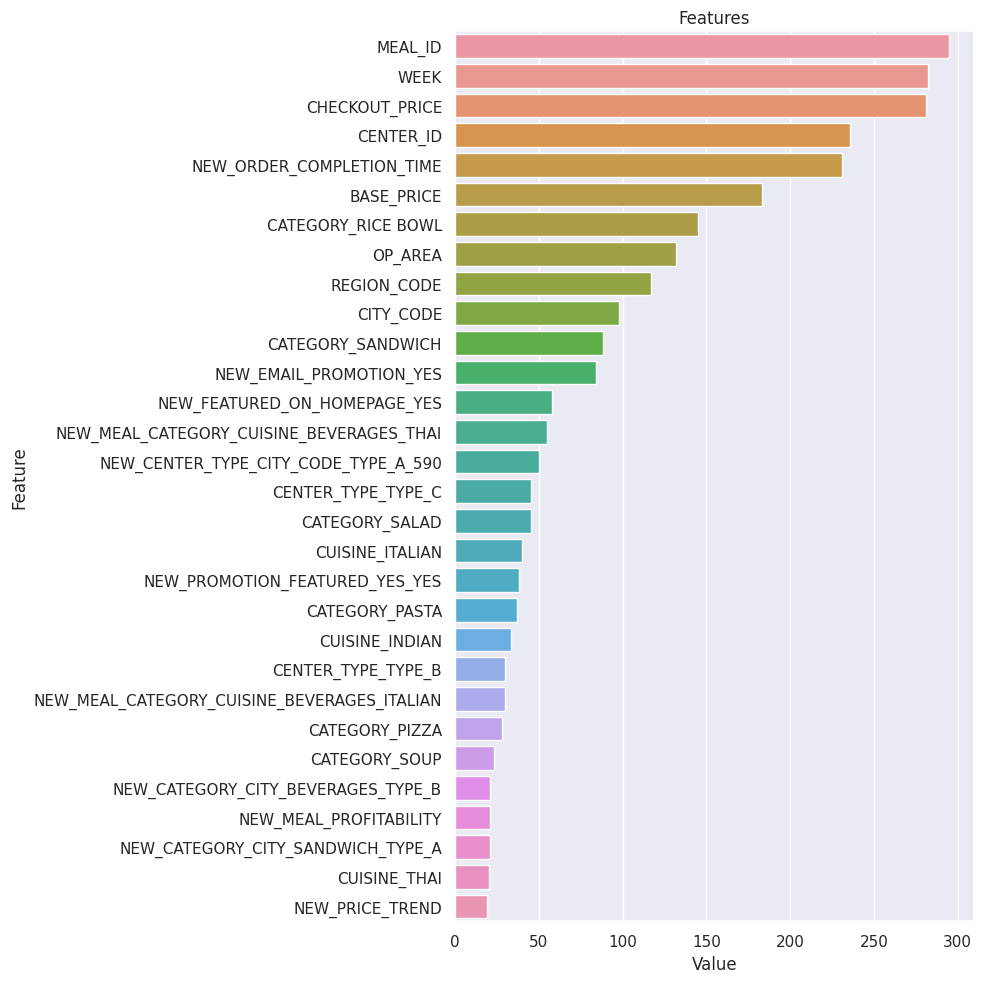

In [44]:
def plot_importance(model, features, num=len(X), save=False):

    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

model = LGBMRegressor()
model.fit(X, y)

plot_importance(model, X, num=30)